<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/New_data_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import torch
import torch.nn as nn

In [3]:
import torch.optim as optim

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [5]:
import matplotlib.pyplot as plt

In [6]:
file_path = '/content/logs_CAD_2024_2.xlsx' # Data from Excel
data = pd.read_excel(file_path)

In [44]:
display(pd.DataFrame(data))

,ID,Spec,MotherTongue,Gender,Age,Activity,DayPart,Lesson
0,29292,1,1,0,20,23,3,1
1,26864,2,0,1,22,7,3,0
2,26861,2,0,1,21,18,1,1
3,26760,3,1,0,22,8,1,1
4,26544,4,1,1,21,9,1,1
5,29598,11,1,1,25,7,1,1
6,29133,1,1,1,20,14,1,1
7,26604,2,0,1,23,6,1,1
8,29346,1,1,1,20,4,1,1
9,26563,4,1,1,21,14,1,1


In [76]:
X = data.drop(['Lesson','DayPart'], axis=1).values
y = data[['Lesson', 'DayPart']].values

In [77]:
y = (y == 1).astype(float) # target values are 0 or 1

In [78]:
#  Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
scaler = StandardScaler() # Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [81]:
class SimpleNN(nn.Module): # define the Model
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x


In [82]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [83]:
criterion = nn.BCELoss()  # Loss Function and Optimizer for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [84]:
num_epochs = 100 # Train the Model
training_losses = []
validation_losses = []

In [85]:
import torch.nn as nn
import torch.nn.functional as F

In [86]:
class SimpleModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ensure the output is in the range [0, 1]
        return x

In [87]:
import torch
import torch.optim as optim
import torch.nn as nn

In [89]:
# define the model
input_size = 10
hidden_size = 5
output_size = 1  #  for binary classification

model = SimpleModel(input_size, hidden_size, output_size)

In [90]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [91]:
# training data
X_train = torch.randn(100, input_size)
y_train = torch.randint(0, 2, (100, 1)).float()

In [92]:
X_test = torch.randn(30, input_size)  #  validation input
y_test = torch.randint(0, 2, (30, 1)).float()  #  binary labels

In [93]:
num_epochs = 100 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.6918, Val Loss: 0.6906
Epoch [20/100], Loss: 0.6881, Val Loss: 0.6886
Epoch [30/100], Loss: 0.6848, Val Loss: 0.6867
Epoch [40/100], Loss: 0.6817, Val Loss: 0.6847
Epoch [50/100], Loss: 0.6788, Val Loss: 0.6827
Epoch [60/100], Loss: 0.6757, Val Loss: 0.6807
Epoch [70/100], Loss: 0.6724, Val Loss: 0.6787
Epoch [80/100], Loss: 0.6687, Val Loss: 0.6764
Epoch [90/100], Loss: 0.6646, Val Loss: 0.6739
Epoch [100/100], Loss: 0.6602, Val Loss: 0.6713


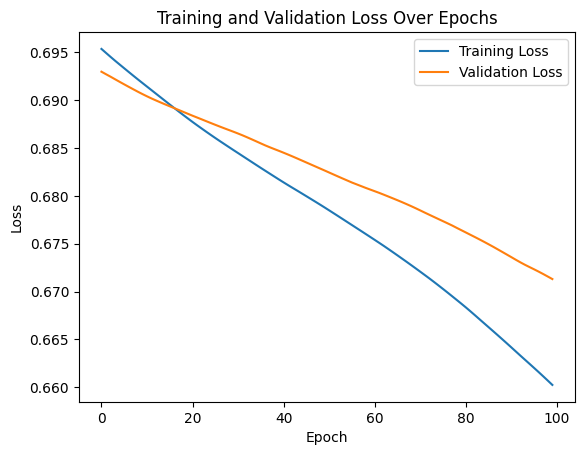

In [94]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Training Loss: The loss value during the training process is decreasing over the epochs, starting from 0.6918 at epoch 10 and ending at 0.6602 at epoch 100.


Validation Loss: Similarly, the validation loss is also decreasing, starting from 0.6906 at epoch 10 and ending at 0.6713 at epoch 100.

Both training and validation losses steadily decrease over time, indicating that the model is learning and improving its predictions as the training progresses.

In [95]:
num_epochs = 200 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/200], Loss: 0.6556, Val Loss: 0.6683
Epoch [20/200], Loss: 0.6512, Val Loss: 0.6655
Epoch [30/200], Loss: 0.6469, Val Loss: 0.6627
Epoch [40/200], Loss: 0.6425, Val Loss: 0.6596
Epoch [50/200], Loss: 0.6383, Val Loss: 0.6565
Epoch [60/200], Loss: 0.6339, Val Loss: 0.6539
Epoch [70/200], Loss: 0.6294, Val Loss: 0.6513
Epoch [80/200], Loss: 0.6251, Val Loss: 0.6484
Epoch [90/200], Loss: 0.6211, Val Loss: 0.6460
Epoch [100/200], Loss: 0.6172, Val Loss: 0.6436
Epoch [110/200], Loss: 0.6132, Val Loss: 0.6409
Epoch [120/200], Loss: 0.6091, Val Loss: 0.6383
Epoch [130/200], Loss: 0.6052, Val Loss: 0.6362
Epoch [140/200], Loss: 0.6013, Val Loss: 0.6347
Epoch [150/200], Loss: 0.5975, Val Loss: 0.6335
Epoch [160/200], Loss: 0.5937, Val Loss: 0.6328
Epoch [170/200], Loss: 0.5900, Val Loss: 0.6317
Epoch [180/200], Loss: 0.5862, Val Loss: 0.6304
Epoch [190/200], Loss: 0.5824, Val Loss: 0.6298
Epoch [200/200], Loss: 0.5788, Val Loss: 0.6294


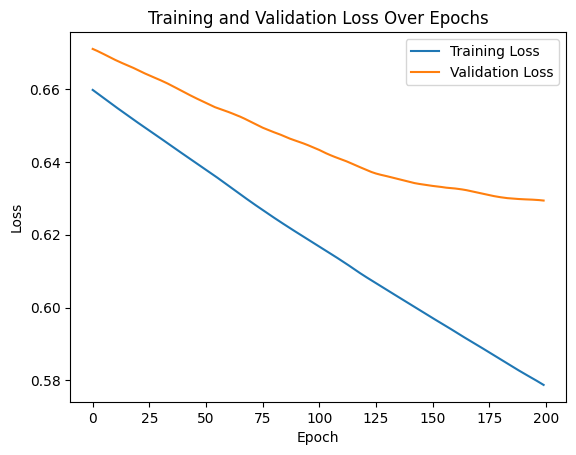

In [96]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

The training loss decreased from 0.6556 to 0.5788 over the course of 200 epochs.
This suggests that the model is learning and improving its performance on the training data.

The validation loss decreased from 0.6683 to 0.6284.
This indicates that while the model is performing better on the training data, its performance on the validation data has deteriorated.

Both training and validation losses steadily decrease over time, indicating that the model is learning and improving its predictions as the training progresses.

In [67]:
model.eval() # evaluate the Model
with torch.no_grad():
    y_predicted = model(X_test).round()

In [99]:
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0., 1.])


The unique values tensor([0., 1.]) in the model's predictions indicate that the model is making binary predictions and can predict both classes.



In [100]:
# is y_test correctly shaped for sklearn's classification_report?
y_test_flat = y_test.flatten()

In [101]:
if len(unique_values) == 1:  # if only one class is predicted, avoid using classification_report
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.42      0.57      0.48        14
     class 1       0.45      0.31      0.37        16

    accuracy                           0.43        30
   macro avg       0.44      0.44      0.43        30
weighted avg       0.44      0.43      0.42        30



In [102]:
print(pd.Series(y_train.numpy().flatten()).value_counts())  # check Data Distribution

0.0    52
1.0    48
Name: count, dtype: int64


In [103]:
with torch.no_grad(): # inspect Model Predictions
    raw_outputs = model(X_test)
    print(raw_outputs[:10])

tensor([[0.7077],
        [0.5420],
        [0.6771],
        [0.0561],
        [0.9109],
        [0.8998],
        [0.1014],
        [0.9816],
        [0.6449],
        [0.3024]])


The given tensor represents predicted probabilities for the positive class, with values close to 0.98 indicating certainty in the predictions.

In [104]:
threshold = 0.3  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.55      0.43      0.48        14
     class 1       0.58      0.69      0.63        16

    accuracy                           0.57        30
   macro avg       0.56      0.56      0.55        30
weighted avg       0.56      0.57      0.56        30



In [105]:
threshold = 0.5  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.5: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.53      0.64      0.58        14
     class 1       0.62      0.50      0.55        16

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.58      0.57      0.57        30

